# Chapter 14: Fitting functions to data

Helper functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)

def scalar_field_heatmap(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100):
    fig = plt.figure()
    fig.set_size_inches(7,7)
    fv = np.vectorize(f)
    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)
    z = fv(X,Y)
    fig, ax = plt.subplots()
    c = ax.pcolormesh(X,Y,z, cmap='plasma')
    ax.axis([X.min(), X.max(), Y.min(), Y.max()])
    fig.colorbar(c, ax=ax)

In [3]:
from vectors import length
def secant_slope(f,xmin,xmax):
    return (f(xmax) - f(xmin)) / (xmax - xmin)

def approx_derivative(f,x,dx=1e-6):
    return secant_slope(f,x-dx,x+dx)

def approx_gradient(f,x0,y0,dx=1e-6):
    partial_x = approx_derivative(lambda x:f(x,y0),x0,dx=dx)
    partial_y = approx_derivative(lambda y:f(x0,y),y0,dx=dx)
    return (partial_x,partial_y)

def gradient_descent(f,xstart,ystart,tolerance=1e-6):
    x = xstart
    y = ystart
    grad = approx_gradient(f,x,y)
    while length(grad) > tolerance:
        x -= 0.01 * grad[0]
        y -= 0.01 * grad[1]
        grad = approx_gradient(f,x,y)
    return x,y

import car data

In [4]:
from car_data import priuses

# 14.1 Measuring the quality of fit for a function

## 14.1.1 Measuring distance from a function

In [5]:
test_data = [
     (-1.0, -2.0137862606487387),
     (-0.9, -1.7730222478628337),
     (-0.8, -1.5510125944820812),
     (-0.7, -1.6071832453434687),
     (-0.6, -0.7530149734137868),
     (-0.5, -1.4185018340443283),
     (-0.4, -0.6055579756271128),
     (-0.3, -1.0067254915961406),
     (-0.2, -0.4382360549665138),
     (-0.1, -0.17621952751051906),
     (0.0, -0.12218090884626329),
     (0.1, 0.07428573423209717),
     (0.2, 0.4268795998864943),
     (0.3, 0.7254661223608084),
     (0.4, 0.04798697977420063),
     (0.5, 1.1578103735448106),
     (0.6, 1.5684111061340824),
     (0.7, 1.157745051031345),
     (0.8, 2.1744401978240675),
     (0.9, 1.6380001974121732),
     (1.0, 2.538951262545233)
]

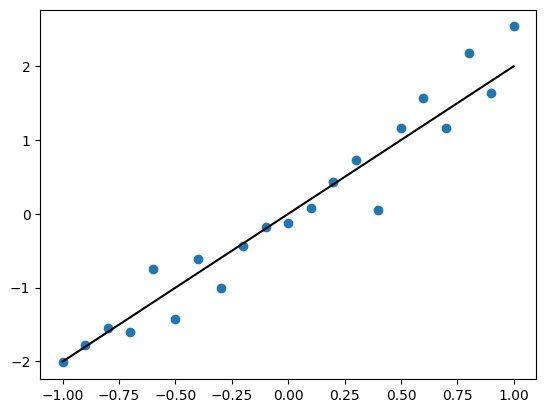

In [6]:
plt.scatter([t[0] for t in test_data],[t[1] for t in test_data])
plot_function(lambda x: 2*x,-1,1,c='k')

Here's the drawing routine I used to illustrate the absolute value cost function

In [7]:
def draw_cost(h,points):
    xs = [t[0] for t in points]
    ys = [t[1] for t in points]
    plt.scatter(xs,ys)
    plot_function(h,min(xs),max(xs),c='k')
    for (x,y) in points:
        plt.plot([x,x],[y,h(x)],c='r')

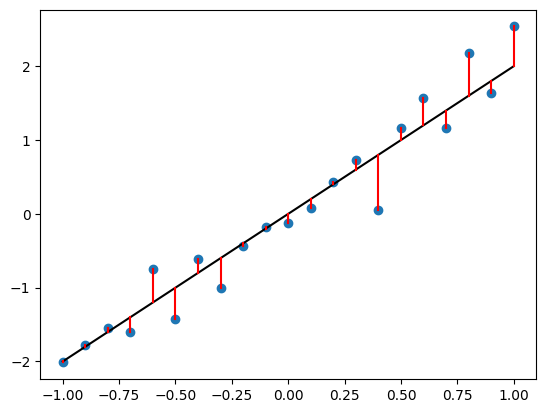

In [8]:
draw_cost(lambda x: 2*x, test_data)

In [9]:
def sum_error(f,data):
    errors = [abs(f(x) - y) for (x,y) in data]
    return sum(errors)

In [10]:
def f(x):
    return 2*x

def g(x):
    return 1-x

In [11]:
sum_error(f,test_data)

5.021727176394801

In [12]:
sum_error(g,test_data)

38.47711311130152

## 14.1.2 Summing the squares of the errors

In [13]:
def sum_squared_error(f,data):
    squared_errors = [(f(x) - y)**2 for (x,y) in data]
    return sum(squared_errors)

here's a function to picture the sum_squared_error for a line

In [14]:
def draw_square_cost(h,points):
    xs = [t[0] for t in points]
    ys = [t[1] for t in points]
    plt.scatter(xs,ys)
    plot_function(h,min(xs),max(xs),c='k')
    for (x,y) in points:
        e = abs(y - h(x))
        plt.plot([x,x],[y,h(x)],c='r')
        plt.fill([x,x,x+e,x+e],[h(x),y,y,h(x)],c='r',alpha=0.5)

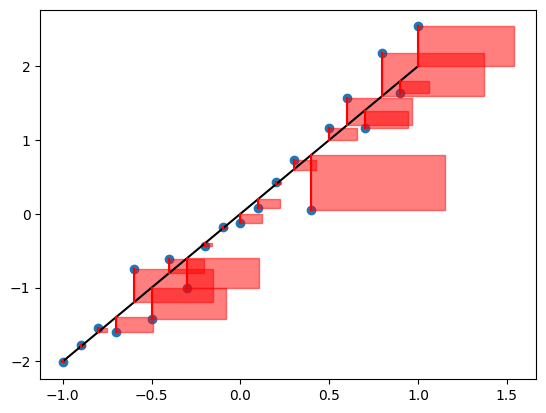

In [15]:
draw_square_cost(lambda x: 2*x, test_data)

In [16]:
sum_squared_error(f,test_data)

2.105175107540148

In [17]:
97.1078879283203

97.1078879283203

## 14.1.3 Calculating cost for car price functions

In [18]:
def plot_mileage_price(cars):
    prices = [c.price for c in cars]
    mileages = [c.mileage for c in cars]
    plt.scatter(mileages, prices, alpha=0.5)
    plt.ylabel("Price ($)",fontsize=16)
    plt.xlabel("Odometer (mi)",fontsize=16)

In [19]:
def p1(x):
    return 25000 - 0.2 * x

def p2(x):
    return 25000 - 0.1 * x

def p3(x):
    return 22500 - 0.1 * x

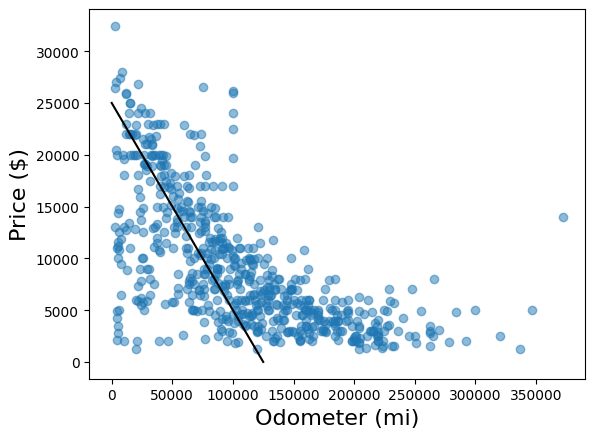

In [20]:
plot_mileage_price(priuses)
plot_function(p1,0,125000,c='k')

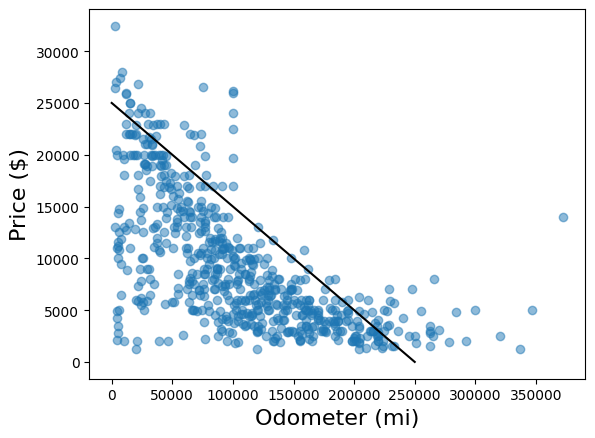

In [21]:
plot_mileage_price(priuses)
plot_function(p2,0,250000,c='k')

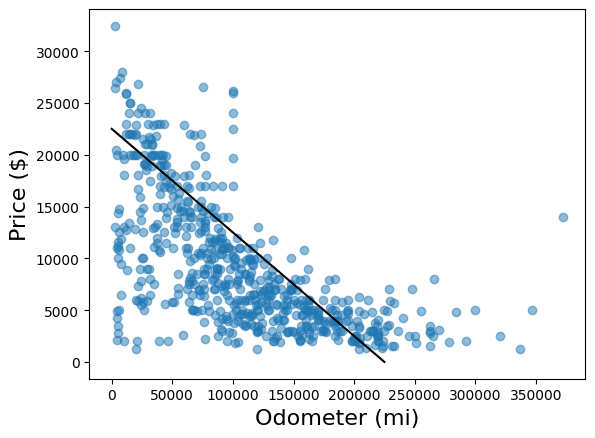

In [22]:
plot_mileage_price(priuses)
plot_function(p3,0,225000,c='k')

In [23]:
prius_mileage_price = [(p.mileage, p.price) for p in priuses]

In [24]:
sum_squared_error(p1, prius_mileage_price)

88782506640.23994

In [25]:
sum_squared_error(p2, prius_mileage_price)

34723507681.559975

In [26]:
sum_squared_error(p3, prius_mileage_price)

22997230681.559994

## 14.1.4 Exercises

### Ex14.1
直線上に並ぶデータの集合を作成し、sum_error と sum_squared_error のコスト関数の両方が
適切な1次関数に対して正確に0を返すことを確認せよ。

In [27]:
def f_ex14_1(x):
    return 2 * x + 3

def prod(x):
    return 2 * x + 3


points = [(x, f_ex14_1(x)) for x in range(0,10)]
print(f"sum_error={sum_error(prod, points)}")
print(f"sum_squared_error={sum_squared_error(prod, points)}")

sum_error=0
sum_squared_error=0


### Ex14.2
2つの1次関数 x + 0.5 と 2x -1 のコストを計算せよ。

In [28]:
def f1(x):
    return x + 0.5

def f2(x):
    return 2 * x - 1

# 「x + 0.5」の方がコストが小さいので、より test_data に当てはまっている
print(f"sum_squared_error of x + 0.5={sum_squared_error(f1, test_data)}")
print(f"sum_squared_error of 2 * x - 1={sum_squared_error(f2, test_data)}")

sum_squared_error of x + 0.5=16.607900877665685
sum_squared_error of 2 * x - 1=23.1942461283472


### Ex14.3
p1,p2,p3 よりもデータによく当てはまるp4を求めよ。

In [29]:
def p4(x):
    return 20000 - 0.1 * x

print(f"sum_squared_error of p1={sum_squared_error(p1, prius_mileage_price)}")
print(f"sum_squared_error of p2={sum_squared_error(p2, prius_mileage_price)}")
print(f"sum_squared_error of p3={sum_squared_error(p3, prius_mileage_price)}")
print(f"sum_squared_error of p4={sum_squared_error(p4, prius_mileage_price)}")


sum_squared_error of p1=88782506640.23994
sum_squared_error of p2=34723507681.559975
sum_squared_error of p3=22997230681.559994
sum_squared_error of p4=18958453681.560005


## 14.2 Exploring spaces of functions

## 14.2.1 Picturing cost for lines through the origin

In [30]:
def test_data_coefficient_cost(a):
    def f(x):
        return a * x
    return sum_squared_error(f,test_data)

Plots from the chapter

Text(0.5, 0, 'a')

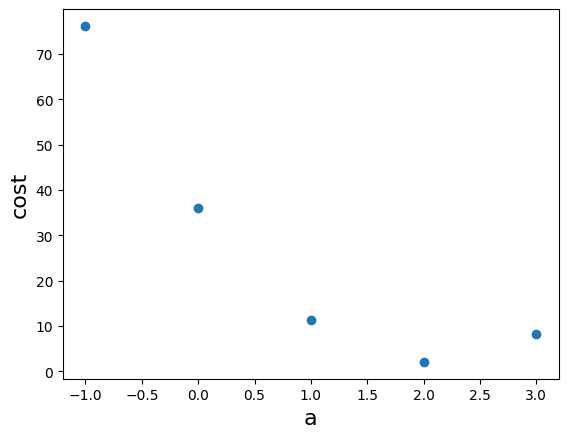

In [31]:
some_slopes = [-1,0,1,2,3]
plt.scatter(some_slopes,[test_data_coefficient_cost(a) for a in some_slopes])
plt.ylabel("cost", fontsize=16)
plt.xlabel("a", fontsize=16)

Text(0.5, 0, 'x')

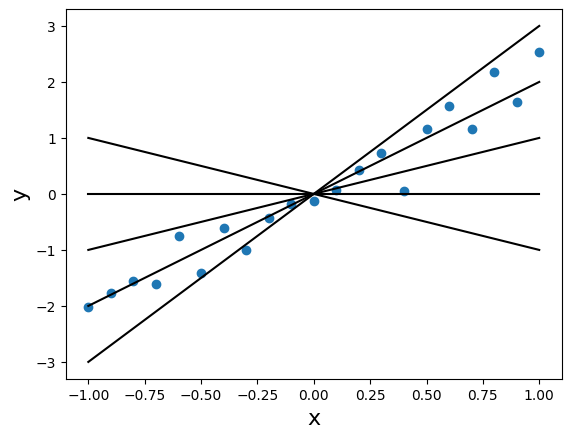

In [32]:
plt.scatter([t[0] for t in test_data],[t[1] for t in test_data])
for a in some_slopes:
    plot_function(lambda x: a*x, -1, 1, c='k')
plt.ylabel("y", fontsize=16)
plt.xlabel("x", fontsize=16)

Text(0.5, 0, 'a')

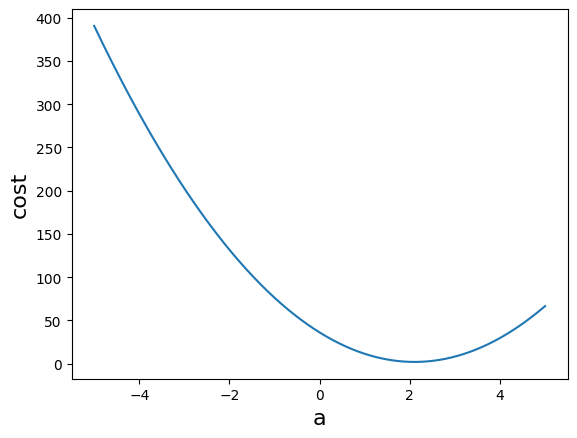

In [33]:
plot_function(test_data_coefficient_cost, -5, 5)
plt.ylabel("cost", fontsize=16)
plt.xlabel("a", fontsize=16)

## 14.2.2 The space of all linear functions

In [34]:
def coefficient_cost(a,b):
    def p(x):
        return a * x + b
    return sum_squared_error(p,prius_mileage_price)

In [35]:
def coefficient_cost(a,b):
    def p(x):
        return a * x + b
    return sum_squared_error(p,prius_mileage_price)

Plots from the chapter

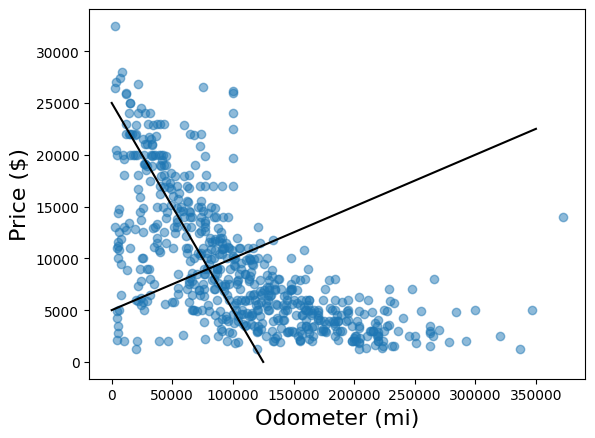

In [36]:
plot_mileage_price(priuses)
plot_function(lambda x: 25000 - 0.20*x,0,125000,c='k')
plot_function(lambda x: 5000 + 0.05*x,0,350000,c='k')

Text(0.5, 0, 'a')

<Figure size 700x700 with 0 Axes>

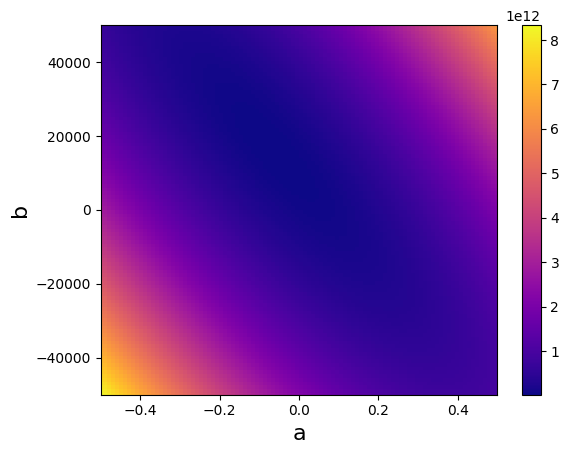

In [37]:
scalar_field_heatmap(coefficient_cost,-0.5,0.5,-50000,50000)
plt.ylabel("b",fontsize=16)
plt.xlabel("a",fontsize=16)

## 14.2.3 Exercises

# 14.3 Finding the line of best fit using gradient descent

## 14.3.1 Rescaling the data

In [38]:
def scaled_cost_function(c,d):
    return coefficient_cost(0.5*c,50000*d)/1e13

In [39]:
mileages = [p.mileage for p in priuses]
prices = [p.price for p in priuses]

In [40]:
def scaled_cost_function(c,d):
    return coefficient_cost(0.5*c,50000*d)/1e13

## 14.3.2 Finding and plotting the line of best fit

In [41]:
c,d = gradient_descent(scaled_cost_function,0,0)

In [42]:
(c,d)

(-0.12111901781162482, 0.3149542288801945)

In [43]:
a = 0.5*c
b = 50000*d
(a,b)

(-0.06055950890581241, 15747.711444009723)

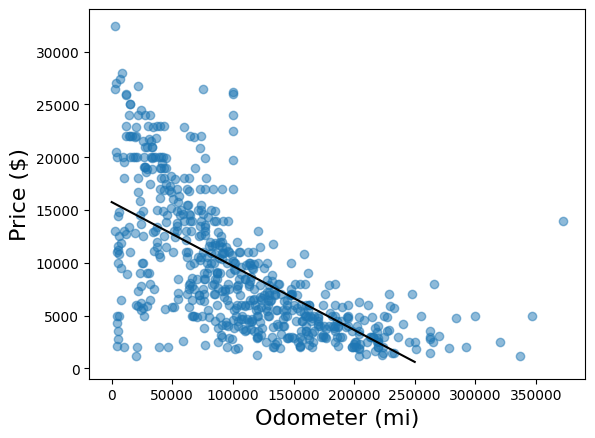

In [44]:
plot_mileage_price(priuses)

def p(x):
    return a*x + b

plot_function(p,0,250000,c='k')

In [45]:
coefficient_cost(a,b)

14536218169.40349

## 14.3.3 Exercises

### Ex14.6
勾配降下法を使って、test_dataに最も当てはまる1次関数を見つけよ。

In [46]:
def test_data_cost(a,b):
    def p(x):
        return a * x + b
    return sum_squared_error(p,test_data)

a,b = gradient_descent(test_data_cost,0,0)
print(f"{a}x+{b}")

2.1037182061463406x+0.0021207385936250667


# 14.4 Fitting a nonlinear function

## 14.4.1 Understanding the behavior of exponential functions

In [47]:
from math import exp

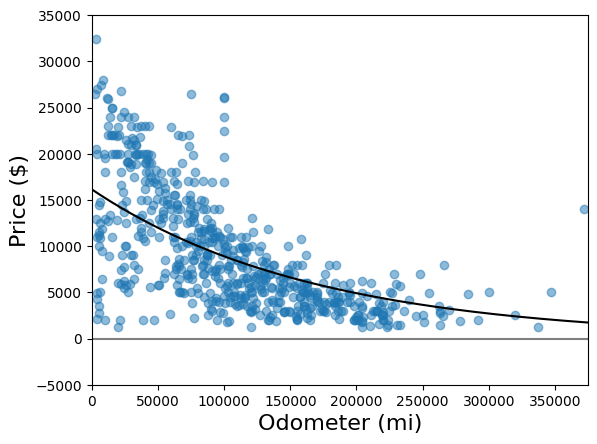

In [48]:
plot_mileage_price(priuses)
plt.ylim(-5000,35000)
plt.xlim(0,375000)
plot_function(lambda x:0, -50000, 400000, c='gray')
q,r = (16133.220556990309, -5.951793936498175e-06)
plot_function(lambda x: q*exp(r*x),0,375000,c='k')

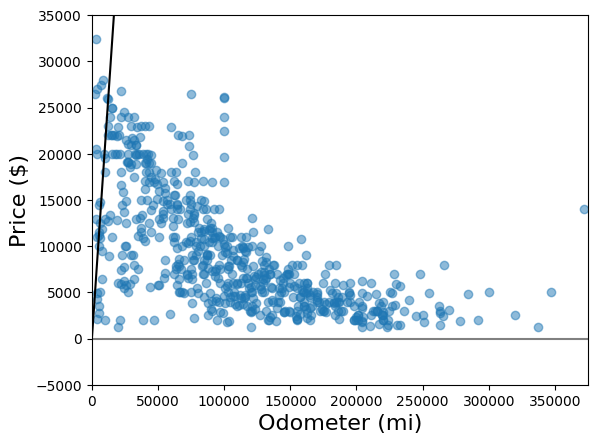

In [49]:
plot_mileage_price(priuses)
plt.ylim(-5000,35000)
plt.xlim(0,375000)
plot_function(lambda x:0, -50000, 400000, c='gray')

plot_function(lambda x: a*x + b,0,375000,c='k')

## 14.4.2 Finding the exponential function of best fit

In [50]:
def exp_coefficient_cost(q,r):
    def f(x):
        return q*exp(r*x) #<1>
    return sum_squared_error(f,prius_mileage_price)

<Figure size 700x700 with 0 Axes>

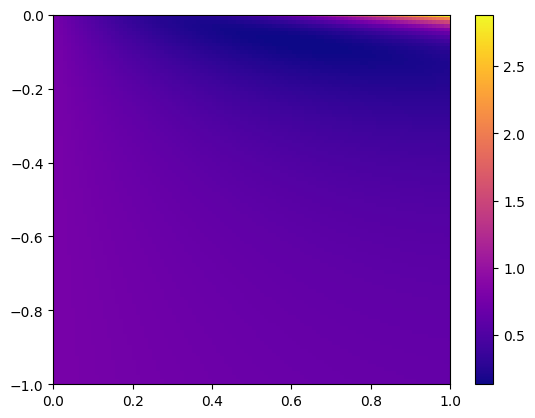

In [51]:
def scaled_exp_coefficient_cost(s,t):
    return exp_coefficient_cost(30000*s,1e-4*t) / 1e11

scalar_field_heatmap(scaled_exp_coefficient_cost,0,1,-1,0)

In [52]:
s,t = gradient_descent(scaled_exp_coefficient_cost,0,0)
(s,t)

(0.6235404892887112, -0.07686877731208301)

In [53]:
q,r = 30000*s,1e-4*t
(q,r)

(18706.214678661338, -7.686877731208301e-06)

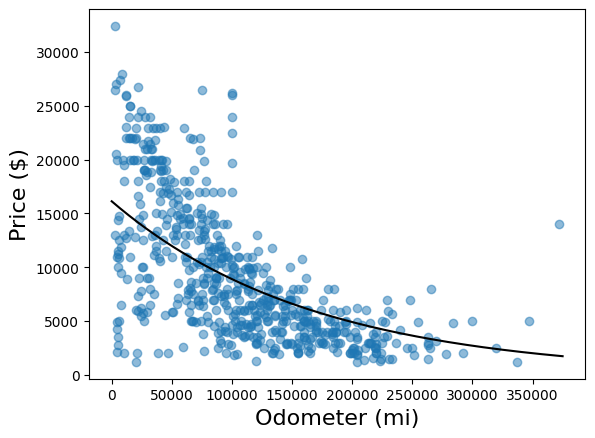

In [54]:
plot_mileage_price(priuses)
q,r = (16133.220556990309, -5.951793936498175e-06)
plot_function(lambda x: q*exp(r*x),0,375000,c='k')

In [55]:
exp_coefficient_cost(q,r)

14071654468.280846

## 14.4.3 Exercises

### Ex14.8
本章で求めた最も良く当てはまる指数関数では、10000マイルごとにプリウスの価値の何%が失われれるか？

In [60]:
# 最もよく当てはまる指数関数は以下
def best_fit_exp(x):
    return 18706 * exp(-7.69 * 1e-6 * x)

for x in range(0,10):
    print(f"best_fit_exp({x*10000})={best_fit_exp(x*10000)}")
    if x > 0:
        lost_percent = 100 * (best_fit_exp((x-1)*10000) - best_fit_exp(x*10000))/ best_fit_exp((x-1)*10000)
        print(f"lost_percent={lost_percent}")


best_fit_exp(0)=18706.0
best_fit_exp(10000)=17321.427657724624
lost_percent=7.401755277854038
best_fit_exp(20000)=16039.337971869323
lost_percent=7.401755277854034
best_fit_exp(30000)=14852.145427003637
lost_percent=7.401755277854045
best_fit_exp(40000)=13752.825968985839
lost_percent=7.401755277854037
best_fit_exp(50000)=12734.875446972348
lost_percent=7.401755277854042
best_fit_exp(60000)=11792.271131447935
lost_percent=7.401755277854034
best_fit_exp(70000)=10919.436080597128
lost_percent=7.401755277854046
best_fit_exp(80000)=10111.206144189633
lost_percent=7.401755277854029
best_fit_exp(90000)=9362.799409757376
lost_percent=7.401755277854034
